In [1]:
import sys, os
from pathlib import Path
home_path = "/Users/nd21aad/Phd/Projects/High-Speed-Odour-Sensing-Using-Miniaturised-Electronic-Nose"  # Define project root directory
# Check if home path exists
if not Path(home_path).exists():
    raise FileNotFoundError("Project root directory not found. Please define home_path variable with the correct path to the project root directory.")
os.chdir(home_path)         # Change working directory to project root directory
sys.path.append(home_path)  # Add project root directory to python path
home_path = Path(home_path)
import matplotlib.pyplot as plt
import pandas as pd

import src.temporal_structure.analysis_enose as analysis_enose
import src.temporal_structure.analysis_pid as analysis_pid
import src.visualizations.temporal_structure as visualizations
import src.temporal_structure.helpers as helpers

In [2]:
# Data directories
parent_dir = Path('/Volumes/SSDExtreme/Work/Data/Crick')    # Change this to the directory where you store the data
data_dir_enose = parent_dir.joinpath('Dataset-FastMachineOlfaction/Enose')
# data_dir_pid = parent_dir.joinpath('Dataset-FastMachineOlfaction/PID/Full')
data_dir_pid = parent_dir.joinpath('Dataset-FastMachineOlfaction/PID/Pulsetrains/PID_pulsetrains')
# data_dir_pid = Path("/Volumes/SSDExtreme/Work/Data/Crick/Dataset-FastMachineOlfaction/PID/Pulsetrains/PID_pulsetrains")

assert data_dir_enose.exists(), f'{data_dir_enose} does not exist'
assert data_dir_pid.exists(), f'{data_dir_pid} does not exist'

# Results directories
result_dir_parent = home_path.joinpath("results/temporal_features")
result_dir_parent.mkdir(exist_ok=True, parents=True)

In [4]:
TRAINVAL = True
TEST = True
FULL = True

# Define run parameters
run_params = {
    'n_splits': 10,
    'ms_start': -100,
    'ms_end': 1200,
    'stimulus_start': 0,
    'stimulus_duration': 1000,
    'buffer': 100,
}

# Select trials
if FULL:
    # Full
    gases_allcombos = [['IA', 'EB'], ['IA', 'Eu'], ['IA', '2H'], ['EB', 'Eu'], ['EB', '2H'], ['Eu', '2H']]
    modalities = ['R_gas', 'T_heat']
    run_params['n_seeds'] = 30
else:
    # Short
    gases_allcombos = [['IA', 'EB']]
    modalities = ['R_gas']
    run_params['n_seeds'] = 2


kinds = ['corr', 'acorr']
freqs = [2, 5, 10, 20, 40, 60]
freqpairs = {'2 vs 20 Hz': [2, 20,], '5 vs 20 Hz': [5, 20,], '10 vs 20 Hz': [10, 20,], '40 vs 20 Hz': [40, 20,], '60 vs 20 Hz': [60, 20]}


## Electronic nose

/Users/nd21aad/Phd/Projects/High-Speed-Odour-Sensing-Using-Miniaturised-Electronic-Nose/src/visualizations/temporal_structure.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  index_train['t_stimulus'] = (pd.to_timedelta(index_train['t_stimulus'])).dt.total_seconds()/60./60.
/Users/nd21aad/Phd/Projects/High-Speed-Odour-Sensing-Using-Miniaturised-Electronic-Nose/src/visualizations/temporal_structure.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  index_test['t_stimulus'] = pd.to_timedelta(index_test[

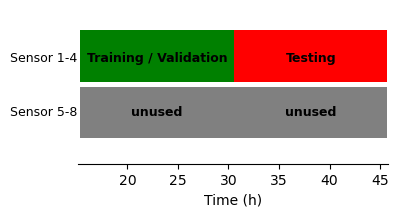

In [5]:
# Load data index
index_file = data_dir_enose.joinpath("index.csv")
index_df = pd.read_csv(index_file)
index_train = index_df[index_df['condition']=='LconstRcycle25ms']    
index_test = index_df[index_df['condition']=='LconstRcycle100ms']  

# Plot train/test splitting
plot_traintest = True
if plot_traintest:
    visualizations.plot_traintest(index_train, index_test, result_dir_parent)

In [5]:
if TRAINVAL:
    analysis_enose.trainval_enose(gases_allcombos, modalities, kinds, freqs, freqpairs, index_train, result_dir_parent, data_dir_enose, run_params)

IA_EB R_gas
Train & Validate


Random seed: 100%|██████████| 30/30 [33:33<00:00, 67.12s/it]


IA_EB T_heat
Train & Validate


Random seed: 100%|██████████| 30/30 [22:44<00:00, 45.47s/it]


IA_Eu R_gas
Train & Validate


Random seed: 100%|██████████| 30/30 [19:16<00:00, 38.55s/it]


IA_Eu T_heat
Train & Validate


Random seed: 100%|██████████| 30/30 [27:38<00:00, 55.30s/it]


IA_2H R_gas
Train & Validate


Random seed: 100%|██████████| 30/30 [40:15<00:00, 80.52s/it]


IA_2H T_heat
Train & Validate


Random seed: 100%|██████████| 30/30 [17:41<00:00, 35.38s/it]


EB_Eu R_gas
Train & Validate


Random seed: 100%|██████████| 30/30 [18:39<00:00, 37.31s/it]


EB_Eu T_heat
Train & Validate


Random seed: 100%|██████████| 30/30 [18:23<00:00, 36.79s/it]


EB_2H R_gas
Train & Validate


Random seed: 100%|██████████| 30/30 [18:45<00:00, 37.51s/it]


EB_2H T_heat
Train & Validate


Random seed: 100%|██████████| 30/30 [18:14<00:00, 36.47s/it]


Eu_2H R_gas
Train & Validate


Random seed: 100%|██████████| 30/30 [22:43<00:00, 45.45s/it]


Eu_2H T_heat
Train & Validate


Random seed: 100%|██████████| 30/30 [19:00<00:00, 38.01s/it]


In [6]:
if TEST:
    analysis_enose.test_enose(gases_allcombos, modalities, kinds, freqs, freqpairs, index_test, result_dir_parent, data_dir_enose, run_params)

IA_EB R_gas
Test


100%|██████████| 30/30 [05:36<00:00, 11.22s/it]


IA_EB T_heat
Test


100%|██████████| 30/30 [04:21<00:00,  8.72s/it]


IA_Eu R_gas
Test


100%|██████████| 30/30 [15:27<00:00, 30.90s/it]


IA_Eu T_heat
Test


100%|██████████| 30/30 [15:37<00:00, 31.24s/it]


IA_2H R_gas
Test


100%|██████████| 30/30 [04:53<00:00,  9.79s/it]


IA_2H T_heat
Test


100%|██████████| 30/30 [08:13<00:00, 16.46s/it]


EB_Eu R_gas
Test


100%|██████████| 30/30 [04:29<00:00,  8.99s/it]


EB_Eu T_heat
Test


100%|██████████| 30/30 [04:03<00:00,  8.11s/it]


EB_2H R_gas
Test


100%|██████████| 30/30 [04:24<00:00,  8.83s/it]


EB_2H T_heat
Test


100%|██████████| 30/30 [11:23<00:00, 22.79s/it]


Eu_2H R_gas
Test


100%|██████████| 30/30 [15:31<00:00, 31.04s/it]


Eu_2H T_heat
Test


100%|██████████| 30/30 [15:02<00:00, 30.10s/it]


Done


## PID

In [7]:
# PID
experiment_name_train = 'rep1'
experiment_name_test = 'rep2'

# # Training / Validation data
pid_index_train = pd.read_csv(data_dir_pid.joinpath(experiment_name_train).joinpath("index.csv"), index_col=0)
pid_index_test = pd.read_csv(data_dir_pid.joinpath(experiment_name_test).joinpath("index.csv"), index_col=0)

In [8]:
if TRAINVAL:
    analysis_pid.trainval_pid(gases_allcombos, kinds, freqs, freqpairs, pid_index_train, data_dir_pid.joinpath(experiment_name_train), result_dir_parent, run_params)


Training
IA_EB


100%|██████████| 30/30 [12:30<00:00, 25.01s/it]


[[1.0, 1.0, 1.0, 1.0, 1.0, 1.0], [1.0, 1.0, 1.0, 1.0, 1.0, 1.0], [1.0, 1.0, 1.0, 1.0, 1.0, 1.0], [1.0, 1.0, 1.0, 1.0, 1.0, 1.0], [1.0, 1.0, 1.0, 1.0, 1.0, 1.0], [1.0, 1.0, 1.0, 1.0, 1.0, 1.0], [1.0, 1.0, 1.0, 1.0, 1.0, 1.0], [1.0, 1.0, 1.0, 1.0, 1.0, 1.0], [1.0, 1.0, 1.0, 1.0, 1.0, 1.0], [1.0, 1.0, 1.0, 1.0, 1.0, 1.0], [1.0, 1.0, 1.0, 1.0, 1.0, 1.0], [1.0, 1.0, 1.0, 1.0, 1.0, 1.0], [1.0, 1.0, 1.0, 1.0, 1.0, 1.0], [1.0, 1.0, 1.0, 1.0, 1.0, 1.0], [1.0, 1.0, 1.0, 1.0, 1.0, 1.0], [1.0, 1.0, 1.0, 1.0, 1.0, 1.0], [1.0, 1.0, 1.0, 1.0, 1.0, 1.0], [1.0, 1.0, 1.0, 1.0, 1.0, 1.0], [1.0, 1.0, 1.0, 1.0, 1.0, 1.0], [1.0, 1.0, 1.0, 1.0, 1.0, 1.0], [1.0, 1.0, 1.0, 1.0, 1.0, 1.0], [1.0, 1.0, 1.0, 1.0, 1.0, 1.0], [1.0, 1.0, 1.0, 1.0, 1.0, 1.0], [1.0, 1.0, 1.0, 1.0, 1.0, 1.0], [1.0, 1.0, 1.0, 1.0, 1.0, 1.0], [1.0, 1.0, 1.0, 1.0, 1.0, 1.0], [1.0, 1.0, 1.0, 1.0, 1.0, 1.0], [1.0, 1.0, 1.0, 1.0, 1.0, 1.0], [1.0, 1.0, 1.0, 1.0, 1.0, 1.0], [1.0, 1.0, 1.0, 1.0, 1.0, 1.0]] [[0.8500000000000001, 1.0, 0.7, 1.0, 1.

100%|██████████| 30/30 [14:19<00:00, 28.64s/it]


[[1.0, 1.0, 1.0, 1.0, 0.8, 0.8], [1.0, 1.0, 1.0, 1.0, 0.8666666666666667, 0.8666666666666667], [1.0, 1.0, 1.0, 1.0, 0.8, 0.9333333333333333], [1.0, 1.0, 1.0, 1.0, 0.8, 0.9333333333333333], [1.0, 1.0, 1.0, 1.0, 0.8, 0.8666666666666667], [1.0, 1.0, 1.0, 1.0, 0.8666666666666667, 0.8666666666666667], [1.0, 1.0, 1.0, 0.8666666666666667, 0.8, 0.8666666666666667], [1.0, 1.0, 1.0, 1.0, 0.8, 0.8666666666666667], [1.0, 1.0, 1.0, 0.9333333333333333, 0.8, 0.8], [1.0, 1.0, 1.0, 0.8666666666666667, 0.8666666666666667, 0.8666666666666667], [1.0, 1.0, 1.0, 1.0, 0.8666666666666667, 0.8666666666666667], [1.0, 1.0, 1.0, 1.0, 0.8, 0.8666666666666667], [1.0, 1.0, 1.0, 1.0, 0.8, 0.8666666666666667], [1.0, 1.0, 1.0, 1.0, 0.8, 0.8666666666666667], [1.0, 1.0, 1.0, 1.0, 0.8, 0.8], [1.0, 1.0, 1.0, 1.0, 0.8, 0.8666666666666667], [1.0, 1.0, 1.0, 1.0, 0.8, 0.8666666666666667], [1.0, 1.0, 1.0, 1.0, 0.8, 0.8666666666666667], [1.0, 1.0, 1.0, 1.0, 0.8, 0.8666666666666667], [1.0, 1.0, 1.0, 1.0, 0.8, 0.8666666666666667],

100%|██████████| 30/30 [14:08<00:00, 28.30s/it]


[[1.0, 1.0, 1.0, 1.0, 1.0, 1.0], [1.0, 1.0, 1.0, 1.0, 1.0, 1.0], [1.0, 1.0, 0.9333333333333333, 1.0, 1.0, 1.0], [1.0, 1.0, 1.0, 1.0, 1.0, 1.0], [1.0, 1.0, 0.9333333333333333, 1.0, 1.0, 1.0], [1.0, 1.0, 0.9333333333333333, 1.0, 1.0, 1.0], [1.0, 1.0, 0.9333333333333333, 1.0, 1.0, 1.0], [1.0, 1.0, 0.9333333333333333, 1.0, 1.0, 1.0], [1.0, 1.0, 0.9333333333333333, 1.0, 1.0, 1.0], [1.0, 1.0, 0.9333333333333333, 1.0, 1.0, 1.0], [1.0, 1.0, 1.0, 1.0, 1.0, 1.0], [1.0, 1.0, 0.9333333333333333, 1.0, 1.0, 1.0], [1.0, 1.0, 0.9333333333333333, 1.0, 1.0, 1.0], [1.0, 1.0, 0.9333333333333333, 1.0, 1.0, 1.0], [1.0, 1.0, 0.9333333333333333, 1.0, 1.0, 1.0], [1.0, 1.0, 0.9333333333333333, 1.0, 1.0, 1.0], [1.0, 1.0, 0.9333333333333333, 1.0, 1.0, 1.0], [1.0, 1.0, 0.9333333333333333, 1.0, 1.0, 1.0], [1.0, 1.0, 0.9333333333333333, 1.0, 1.0, 1.0], [1.0, 1.0, 0.9333333333333333, 1.0, 1.0, 1.0], [1.0, 1.0, 1.0, 1.0, 1.0, 1.0], [1.0, 1.0, 0.9333333333333333, 1.0, 1.0, 1.0], [1.0, 1.0, 0.9333333333333333, 1.0, 1.0,

100%|██████████| 30/30 [1:53:03<00:00, 226.13s/it]   


[[1.0, 1.0, 1.0, 1.0, 1.0, 1.0], [1.0, 1.0, 1.0, 1.0, 1.0, 1.0], [1.0, 1.0, 1.0, 1.0, 1.0, 1.0], [1.0, 1.0, 1.0, 1.0, 1.0, 1.0], [1.0, 1.0, 1.0, 1.0, 1.0, 1.0], [1.0, 1.0, 1.0, 1.0, 1.0, 1.0], [1.0, 1.0, 1.0, 1.0, 1.0, 1.0], [1.0, 1.0, 1.0, 1.0, 1.0, 1.0], [1.0, 1.0, 1.0, 1.0, 1.0, 1.0], [1.0, 1.0, 1.0, 1.0, 1.0, 1.0], [1.0, 1.0, 1.0, 1.0, 1.0, 1.0], [1.0, 1.0, 1.0, 1.0, 1.0, 1.0], [1.0, 1.0, 1.0, 1.0, 1.0, 1.0], [1.0, 1.0, 1.0, 1.0, 1.0, 1.0], [1.0, 1.0, 1.0, 1.0, 1.0, 1.0], [1.0, 1.0, 1.0, 1.0, 1.0, 1.0], [1.0, 1.0, 1.0, 1.0, 1.0, 1.0], [1.0, 1.0, 1.0, 1.0, 1.0, 1.0], [1.0, 1.0, 1.0, 1.0, 1.0, 1.0], [1.0, 1.0, 1.0, 1.0, 1.0, 1.0], [1.0, 1.0, 1.0, 1.0, 1.0, 1.0], [1.0, 1.0, 1.0, 1.0, 1.0, 1.0], [1.0, 1.0, 1.0, 1.0, 1.0, 1.0], [1.0, 1.0, 1.0, 1.0, 1.0, 1.0], [1.0, 1.0, 1.0, 1.0, 1.0, 1.0], [1.0, 1.0, 1.0, 1.0, 1.0, 1.0], [1.0, 1.0, 1.0, 1.0, 1.0, 1.0], [1.0, 1.0, 1.0, 1.0, 1.0, 1.0], [1.0, 1.0, 1.0, 1.0, 1.0, 1.0], [1.0, 1.0, 1.0, 1.0, 1.0, 1.0]] [[1.0, 1.0, 1.0, 0.9, 1.0, 0.9], [1.0, 

100%|██████████| 30/30 [14:01<00:00, 28.05s/it]


[[1.0, 1.0, 1.0, 1.0, 1.0, 1.0], [1.0, 1.0, 1.0, 0.9333333333333333, 1.0, 1.0], [1.0, 1.0, 1.0, 1.0, 1.0, 1.0], [1.0, 1.0, 1.0, 0.9333333333333333, 1.0, 1.0], [1.0, 1.0, 1.0, 0.9333333333333333, 1.0, 1.0], [1.0, 1.0, 1.0, 1.0, 1.0, 1.0], [1.0, 1.0, 1.0, 1.0, 1.0, 1.0], [1.0, 1.0, 1.0, 1.0, 1.0, 1.0], [1.0, 1.0, 1.0, 1.0, 1.0, 1.0], [1.0, 1.0, 1.0, 0.9333333333333333, 1.0, 1.0], [1.0, 1.0, 1.0, 1.0, 1.0, 1.0], [1.0, 1.0, 1.0, 1.0, 1.0, 1.0], [1.0, 1.0, 1.0, 1.0, 1.0, 1.0], [1.0, 1.0, 1.0, 1.0, 1.0, 1.0], [1.0, 1.0, 1.0, 0.9333333333333333, 1.0, 1.0], [1.0, 1.0, 1.0, 1.0, 1.0, 1.0], [1.0, 1.0, 1.0, 1.0, 1.0, 1.0], [1.0, 1.0, 1.0, 1.0, 1.0, 1.0], [1.0, 1.0, 1.0, 1.0, 1.0, 1.0], [1.0, 1.0, 1.0, 1.0, 1.0, 1.0], [1.0, 1.0, 1.0, 1.0, 1.0, 1.0], [1.0, 1.0, 1.0, 1.0, 1.0, 1.0], [1.0, 1.0, 1.0, 0.9333333333333333, 1.0, 1.0], [1.0, 1.0, 1.0, 1.0, 1.0, 1.0], [1.0, 1.0, 1.0, 1.0, 1.0, 1.0], [1.0, 1.0, 1.0, 0.9333333333333333, 1.0, 1.0], [1.0, 1.0, 1.0, 1.0, 1.0, 1.0], [1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

100%|██████████| 30/30 [14:09<00:00, 28.32s/it]


[[0.9333333333333333, 1.0, 1.0, 0.9333333333333333, 0.9333333333333333, 1.0], [0.9333333333333333, 1.0, 1.0, 0.9333333333333333, 0.9333333333333333, 1.0], [0.9333333333333333, 1.0, 1.0, 0.9333333333333333, 0.9333333333333333, 1.0], [0.9333333333333333, 1.0, 1.0, 0.9333333333333333, 0.9333333333333333, 1.0], [0.9333333333333333, 1.0, 1.0, 0.9333333333333333, 0.9333333333333333, 1.0], [0.9333333333333333, 1.0, 1.0, 0.9333333333333333, 0.9333333333333333, 0.9333333333333333], [0.9333333333333333, 1.0, 1.0, 0.9333333333333333, 0.8666666666666667, 1.0], [0.9333333333333333, 1.0, 1.0, 0.9333333333333333, 0.9333333333333333, 1.0], [0.9333333333333333, 1.0, 1.0, 0.9333333333333333, 0.9333333333333333, 1.0], [0.9333333333333333, 1.0, 1.0, 0.9333333333333333, 0.9333333333333333, 1.0], [0.9333333333333333, 1.0, 1.0, 0.9333333333333333, 0.9333333333333333, 1.0], [0.9333333333333333, 1.0, 1.0, 0.9333333333333333, 0.9333333333333333, 1.0], [0.9333333333333333, 1.0, 1.0, 0.9333333333333333, 0.9333333

In [9]:
if TEST:
    analysis_pid.test_pid(gases_allcombos, kinds, freqs, freqpairs, pid_index_test, data_dir_pid.joinpath(experiment_name_test), result_dir_parent, run_params)

Test
IA_EB


100%|██████████| 30/30 [03:51<00:00,  7.73s/it]


IA_Eu


100%|██████████| 30/30 [05:16<00:00, 10.54s/it]


IA_2H


100%|██████████| 30/30 [05:10<00:00, 10.35s/it]


EB_Eu


100%|██████████| 30/30 [04:52<00:00,  9.76s/it]


EB_2H


100%|██████████| 30/30 [04:40<00:00,  9.34s/it]


Eu_2H


100%|██████████| 30/30 [04:39<00:00,  9.30s/it]


## Plotting results

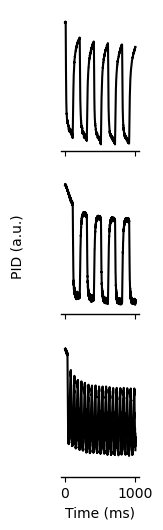

In [10]:
# Plot selected PID
tmin, tmax, i = 0, 1000, 0
codes_selected = ['corr_EB_IA_5', 'acor_IA_EB_5', 'acor_IA_EB_20']
pids_data, pids_t = helpers.extract_pids(codes_selected, tmin, tmax, pid_index_train, data_dir_pid.joinpath(experiment_name_train), i=0)
visualizations.plot_pid(pids_t, pids_data, result_dir=result_dir_parent)

In [11]:
# Plot features for selected codes(compare multiple trials)
gases = ['IA', 'EB']
kinds = ['corr', 'acorr']
index_train_selected = index_train.query(f"(kind == '{kinds[0]}' | kind == '{kinds[1]}') & ((gas1 == '{gases[0]}' & gas2 == '{gases[1]}') | (gas1 == '{gases[1]}' & gas2 == '{gases[0]}'))")
index_train_selected = index_train_selected.query(f"shape != '1Hz'")
codes_selected = ['corr_EB_IA_5', 'acor_IA_EB_5', 'acor_IA_EB_20']
params = {
    "data_dir_enose": data_dir_enose,
    "result_dir_parent": result_dir_parent,
    "ms_start": -100,
    "ms_end": 1200,
    "stimulus_start": 0,
    "stimulus_duration": 1000+101,#00,
    "modality": "R_gas",
}
nose_data_selected_allcodes, t_selected_allcodes, ffs_selected_allcodes = visualizations.get_data_for_plots(index_train_selected, codes_selected, params)
nose_data_selected = [n[0] for n in nose_data_selected_allcodes]    # First of each code
t_selected = [t[0] for t in t_selected_allcodes]                    # First of each code
ffs_selected = [f[0] for f in ffs_selected_allcodes]    

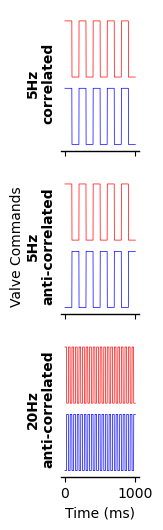

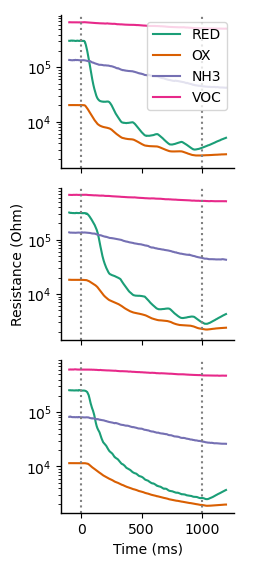

/Users/nd21aad/Phd/Projects/High-Speed-Odour-Sensing-Using-Miniaturised-Electronic-Nose/src/temporal_structure/helpers.py:123: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array(freqs_peaks_all), np.array(magnitudes_peaks_all), np.array(phases_peaks_all), np.array(x_all), np.array(y_all)
/Users/nd21aad/Phd/Projects/High-Speed-Odour-Sensing-Using-Miniaturised-Electronic-Nose/src/temporal_structure/helpers.py:123: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array(freqs_peaks_all), np.array(magnitudes_peaks_all), np.array(phases_p

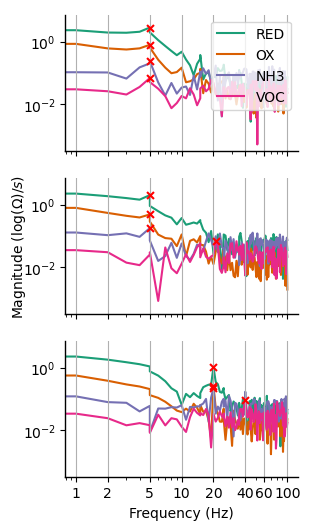

/Users/nd21aad/Phd/Projects/High-Speed-Odour-Sensing-Using-Miniaturised-Electronic-Nose/src/temporal_structure/helpers.py:123: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array(freqs_peaks_all), np.array(magnitudes_peaks_all), np.array(phases_peaks_all), np.array(x_all), np.array(y_all)


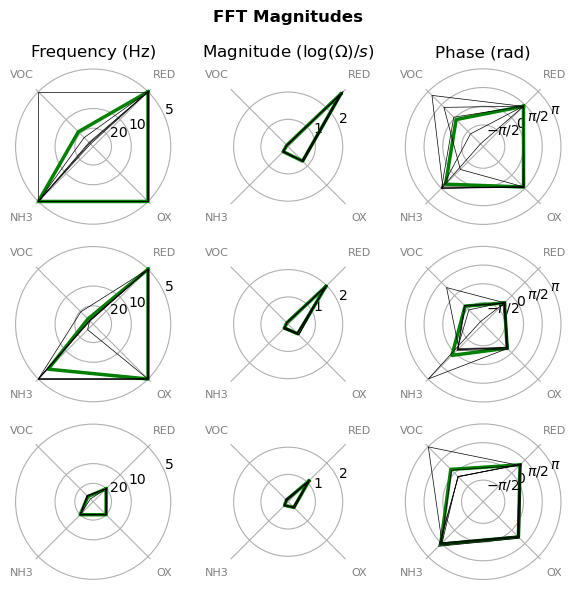

/Users/nd21aad/Phd/Projects/High-Speed-Odour-Sensing-Using-Miniaturised-Electronic-Nose/results/temporal_features


In [12]:
# Plot valve commands / theoretical odour modulation, for selected codes
visualizations.plot_modulation([int(code[11:]) for code in codes_selected], [code[:4] for code in codes_selected], result_dir_parent)

# Plot raw MOx data, for selected codes
visualizations.plot_raw(t_selected, nose_data_selected, result_dir_parent, params)

# Plot fourier analysis of raw MOx data, for selected codes
visualizations.plot_magnitudes(ffs_selected, result_dir_parent, params)

# Plot peak features as spider plots, for selected codes
peak_features = helpers.get_peak_features(codes_selected, ffs_selected_allcodes)
visualizations.make_spider(peak_features, result_dir_parent) 

# %%
# # Method results figures: PID + R_gas + T_heat, for corr/acorr x 5Hz/20Hz
if False:
    # raw_data_plots(index_train, data_dir_enose, pid, result_dir_parent)
    visualizations.raw_data_plots(index_train, data_dir_enose, pid_index_train, data_dir_pid.joinpath(experiment_name_train), result_dir_parent)


(6, 30, 6)
(30, 6) (30, 6) (30, 6) (30, 6) (30, 6) (30, 6)
[[1.         1.         1.         1.         0.86666667 1.        ]
 [0.93333333 1.         1.         1.         0.93333333 1.        ]
 [0.93333333 1.         1.         1.         0.93333333 1.        ]
 [1.         1.         1.         1.         0.93333333 1.        ]
 [1.         1.         1.         1.         0.86666667 1.        ]
 [1.         1.         1.         1.         0.8        1.        ]
 [0.93333333 1.         1.         1.         0.8        1.        ]
 [0.93333333 1.         1.         1.         0.8        1.        ]
 [0.93333333 1.         1.         1.         0.93333333 1.        ]
 [0.93333333 1.         1.         1.         0.93333333 1.        ]
 [0.93333333 1.         1.         1.         0.93333333 0.93333333]
 [1.         1.         1.         1.         0.8        1.        ]
 [1.         1.         1.         1.         0.93333333 1.        ]
 [0.93333333 1.         1.         1.       

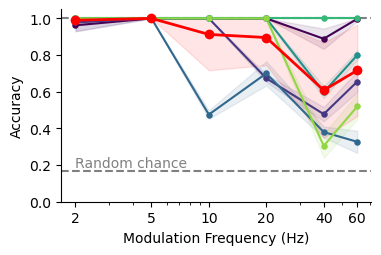

FREQPAIRS MEAN:  [1.         1.         0.96555556 0.90203704 0.90314815]
FREQPAIRS STD:  [0.         0.         0.06665741 0.13006    0.12525023]


/Users/nd21aad/Phd/Projects/High-Speed-Odour-Sensing-Using-Miniaturised-Electronic-Nose/src/visualizations/temporal_structure.py:395: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


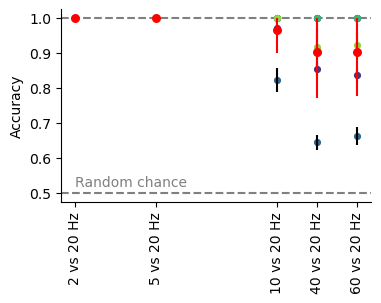

ACORR MEAN:  [0.95       0.78722222 0.71888889 0.70555556 0.53722222 0.4675    ]
ACORR STD:  [0.0802773  0.19854486 0.19430471 0.13620745 0.05605608 0.04609019]


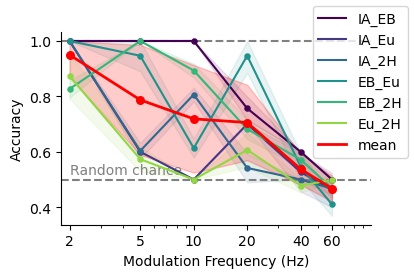

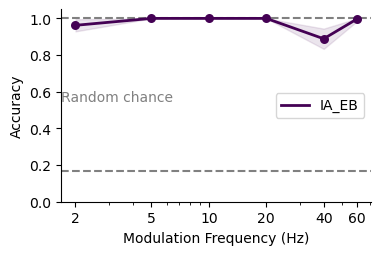

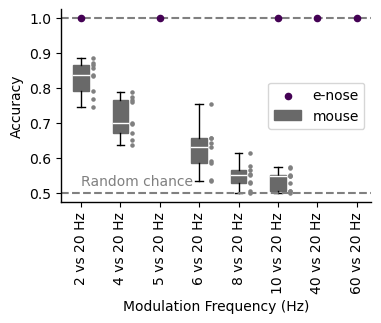

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


E-nose [1.         1.         1.         0.75666667 0.6        0.5       ] [0.         0.         0.         0.04229526 0.         0.        ]
Mouse [       nan 0.77503154 0.74522978 0.72783867 0.71279493 0.69453405
 0.68433042 0.67495808 0.6608611  0.65599453 0.64806986 0.64361427
 0.63038151 0.63424235 0.62989658 0.62408803 0.62031669 0.61404705
 0.61477114 0.62102614 0.59823981 0.58936827 0.5938829  0.59082846
 0.58393187 0.5873359  0.57667854 0.58247129 0.57184556 0.5840425
 0.5859792  0.56337566 0.58746907 0.56470871 0.57559041 0.56774977
 0.55768432 0.54667568 0.56580015        nan        nan 0.55978078
 0.53085971 0.55206351 0.52398864 0.53610763 0.5298632  0.55720579
        nan 0.51998783 0.54233688 0.53573766        nan 0.54373088
 0.53937326 0.54202078 0.52199112 0.53590999        nan 0.54852085
        nan        nan 0.52900809 0.50418353 0.51905105 0.50726156
        nan 0.53712215 0.54747348 0.53931221 0.49745426 0.52181023
 0.51986731 0.52763455 0.5086056  0.50224385    

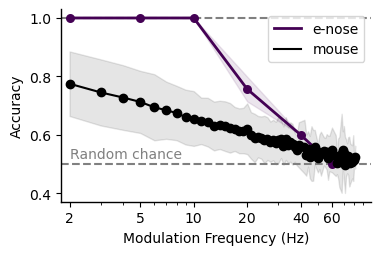

/Users/nd21aad/Phd/Projects/High-Speed-Odour-Sensing-Using-Miniaturised-Electronic-Nose/src/visualizations/temporal_structure.py:216: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


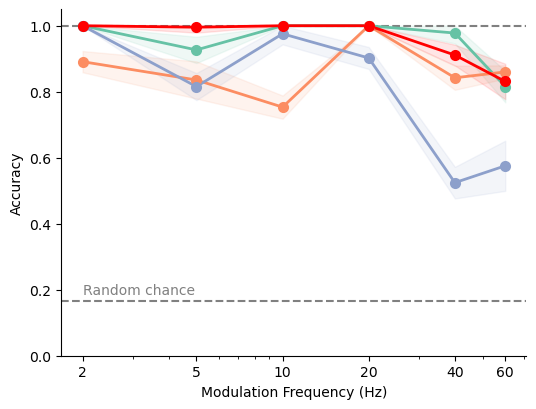

/Users/nd21aad/Phd/Projects/High-Speed-Odour-Sensing-Using-Miniaturised-Electronic-Nose/src/visualizations/temporal_structure.py:331: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


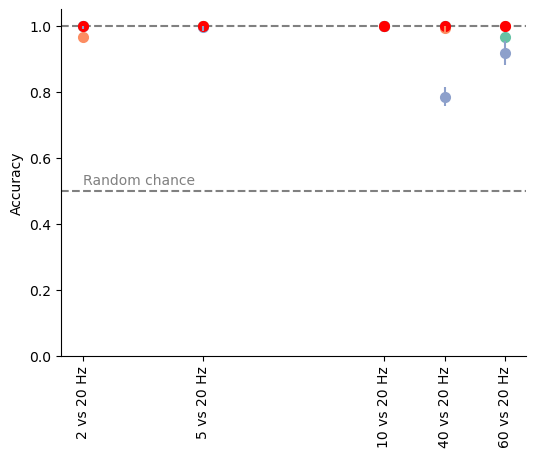

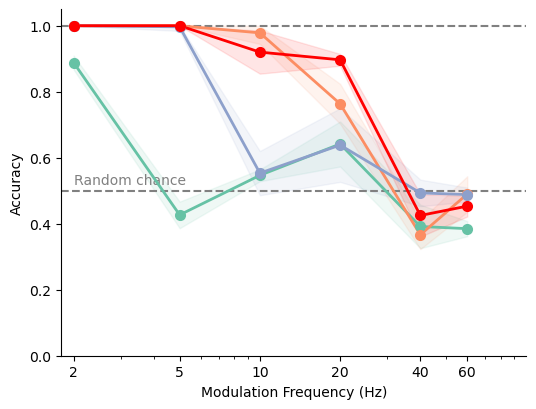

(6, 30, 6)
(30, 6) (30, 6) (30, 6) (30, 6) (30, 6) (30, 6)
[[0.06666667 0.06666667 0.         0.13333333 0.33333333 0.13333333]
 [0.         0.06666667 0.         0.2        0.26666667 0.13333333]
 [0.06666667 0.06666667 0.2        0.         0.26666667 0.2       ]
 [0.06666667 0.13333333 0.06666667 0.06666667 0.26666667 0.13333333]
 [0.06666667 0.06666667 0.06666667 0.13333333 0.26666667 0.2       ]
 [0.13333333 0.13333333 0.33333333 0.         0.33333333 0.2       ]
 [0.         0.06666667 0.06666667 0.13333333 0.33333333 0.13333333]
 [0.06666667 0.06666667 0.13333333 0.2        0.4        0.2       ]
 [0.06666667 0.06666667 0.06666667 0.06666667 0.33333333 0.13333333]
 [0.06666667 0.26666667 0.2        0.         0.26666667 0.2       ]
 [0.06666667 0.06666667 0.33333333 0.06666667 0.33333333 0.2       ]
 [0.06666667 0.06666667 0.06666667 0.2        0.26666667 0.13333333]
 [0.06666667 0.06666667 0.13333333 0.         0.26666667 0.2       ]
 [0.06666667 0.06666667 0.26666667 0.1333333

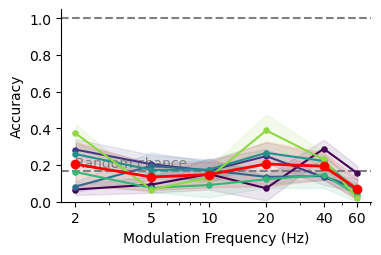

FREQPAIRS MEAN:  [0.53722222 0.48222222 0.50444444 0.50666667 0.50481481]
FREQPAIRS STD:  [0.07347419 0.07976818 0.07212814 0.09650689 0.11056098]


/Users/nd21aad/Phd/Projects/High-Speed-Odour-Sensing-Using-Miniaturised-Electronic-Nose/src/visualizations/temporal_structure.py:395: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


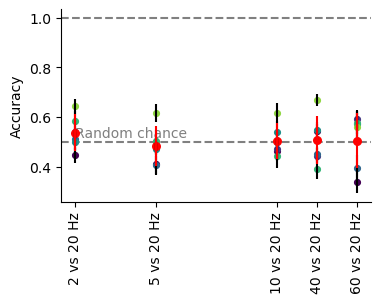

ACORR MEAN:  [0.53861111 0.49333333 0.52611111 0.50777778 0.48861111 0.48138889]
ACORR STD:  [0.05318483 0.03887301 0.07040667 0.09843529 0.06868417 0.04347111]


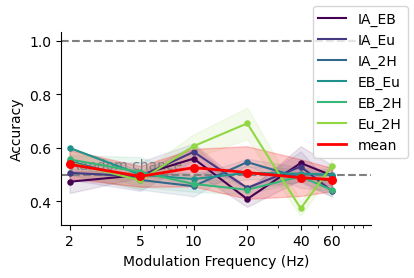

In [13]:
# Main results figures: R_gas Test for all gases
if True:
    gases_allcombos = [['IA', 'EB'], ['IA', 'Eu'], ['IA', '2H'], ['EB', 'Eu'], ['EB', '2H'], ['Eu', '2H']]
    modality = 'R_gas'
    visualizations.plot_freq_comparison(result_dir_parent, gases_allcombos, modality, filename=f"accs_freqs_allfeatures_test_all_{modality}.npy")
    visualizations.plot_freqpairs_comparison(result_dir_parent, gases_allcombos, modality, filename="accs_freqpairs_freqs_test_all_") 
    visualizations.plot_corracorr_comparison(result_dir_parent, gases_allcombos, modality, filename=f"accs_pattern_allfeatures_test_all_{modality}.npy")

#%%
# Main results figures: IA-EB subset / mouse comparison: freq discrimination, binary freq discrimination, corr/acorr
if True:
    gases = ['IA', 'EB']
    modality = 'R_gas'
    visualizations.plot_freq_IAEB(result_dir_parent, gases, modality, filename=f"accs_freqs_allfeatures_test_all_{modality}.npy")
    visualizations.plot_freqdiscr_IAEB_mouse_comparison(result_dir_parent, gases, modality, filename="accs_freqpairs_freqs_test_all_") 
    visualizations.plot_corracorr_IAEB_mouse_comparison(result_dir_parent, gases, modality, filename=f"accs_pattern_allfeatures_test_all_{modality}.npy")  

#%%
# Method results figures: validation scores
if True:
    modality = 'R_gas'
    features = ["frequency", "magnitude", "phase", "allfeatures"]
    gases = ['IA', 'EB']
    visualizations.plot_freq_val_features(result_dir_parent, gases, features, modality)
    visualizations.plot_freqpairs_val_features(result_dir_parent, gases, features, modality) 
    visualizations.plot_corracorr_val_features(result_dir_parent, gases, features, modality)

#%%
# Method results figures: T_heat Test for all gases
if True:
    modality = 'T_heat'
    visualizations.plot_freq_comparison(result_dir_parent, gases_allcombos, modality, filename=f"accs_freqs_allfeatures_test_all_{modality}.npy")
    visualizations.plot_freqpairs_comparison(result_dir_parent, gases_allcombos, modality, filename="accs_freqpairs_freqs_test_all_")  
    visualizations.plot_corracorr_comparison(result_dir_parent, gases_allcombos, modality, filename=f"accs_pattern_allfeatures_test_all_{modality}.npy")



(6, 30, 6)
(30, 6) (30, 6) (30, 6) (30, 6) (30, 6) (30, 6)
[[1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1.]]
FREQS MEAN:  [0.98888889 1.         0.99111111 0.98407407 0.95888889 0.97703704]
FREQS STD:  [0.0248452  0.         0.02266231 0.03011409 0.06786879 0.05179362]


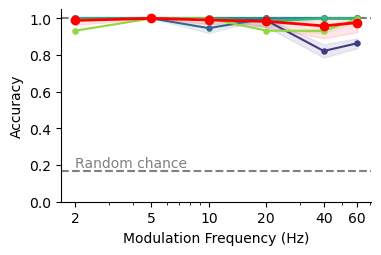

FREQPAIRS MEAN:  [0.99722222 1.         0.99833333 0.99425926 0.9937037 ]
FREQPAIRS STD:  [0.00921285 0.         0.00726483 0.01306704 0.01481944]


/Users/nd21aad/Phd/Projects/High-Speed-Odour-Sensing-Using-Miniaturised-Electronic-Nose/src/visualizations/temporal_structure.py:395: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


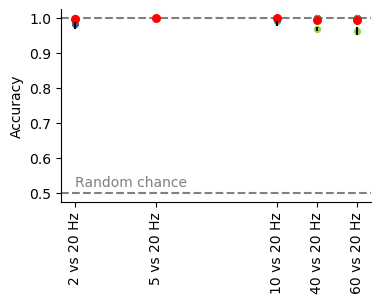

ACORR MEAN:  [0.98861111 0.9825     0.95722222 0.95611111 0.9775     0.98666667]
ACORR STD:  [0.03489291 0.03925522 0.09590537 0.0473332  0.03810621 0.03399346]


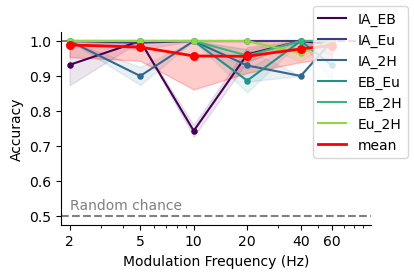

In [14]:
#%%
# Method results figures: PID validation for all gases
modality = 'pid'
# result_dir_parent = home_path.joinpath("results/newest/temporal_features_PID_nodiff")
gases_allcombos = [['IA', 'EB'], ['IA', 'Eu'], ['IA', '2H'], ['EB', 'Eu'], ['EB', '2H'], ['Eu', '2H']]
visualizations.plot_freq_comparison(result_dir_parent, gases_allcombos, modality, filename=f"accs_freqs_allfeatures_all_val_{modality}.npy")    
visualizations.plot_freqpairs_comparison(result_dir_parent, gases_allcombos, modality, filename="accs_freqpairs_allfeatures_val_") 
visualizations.plot_corracorr_comparison(result_dir_parent, gases_allcombos, modality, filename=f"accs_pattern_allfeatures_all_val_{modality}.npy")